In [1]:
import warnings
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition


warnings.filterwarnings('ignore')
print("Imported all!")

df = pd.read_csv('wines.csv').dropna()
print("Shape of the loaded dataset: {} rows and {} columns.".format(df.shape[0], df.shape[1]))
df.head()

Imported all!
Shape of the loaded dataset: 178 rows and 13 columns.


,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# let us standardize all the data entries
standardized_data = scaler.fit_transform(df)
df_standardized = pd.DataFrame(standardized_data, columns=df.columns)
df_standardized.columns = [col + "_stand" for col in df.columns]

In [3]:
df_standardized.head()

,Alcohol_stand,Malic_Acid_stand,Ash_stand,Ash_Alkalinity_stand,Magnesium_stand,Total_Phenols_stand,Flavonoids_stand,Stilbenes_stand,Proanthocyanins_stand,Color_Intensity_stand,Hue_stand,OD280_stand,Proline_stand
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


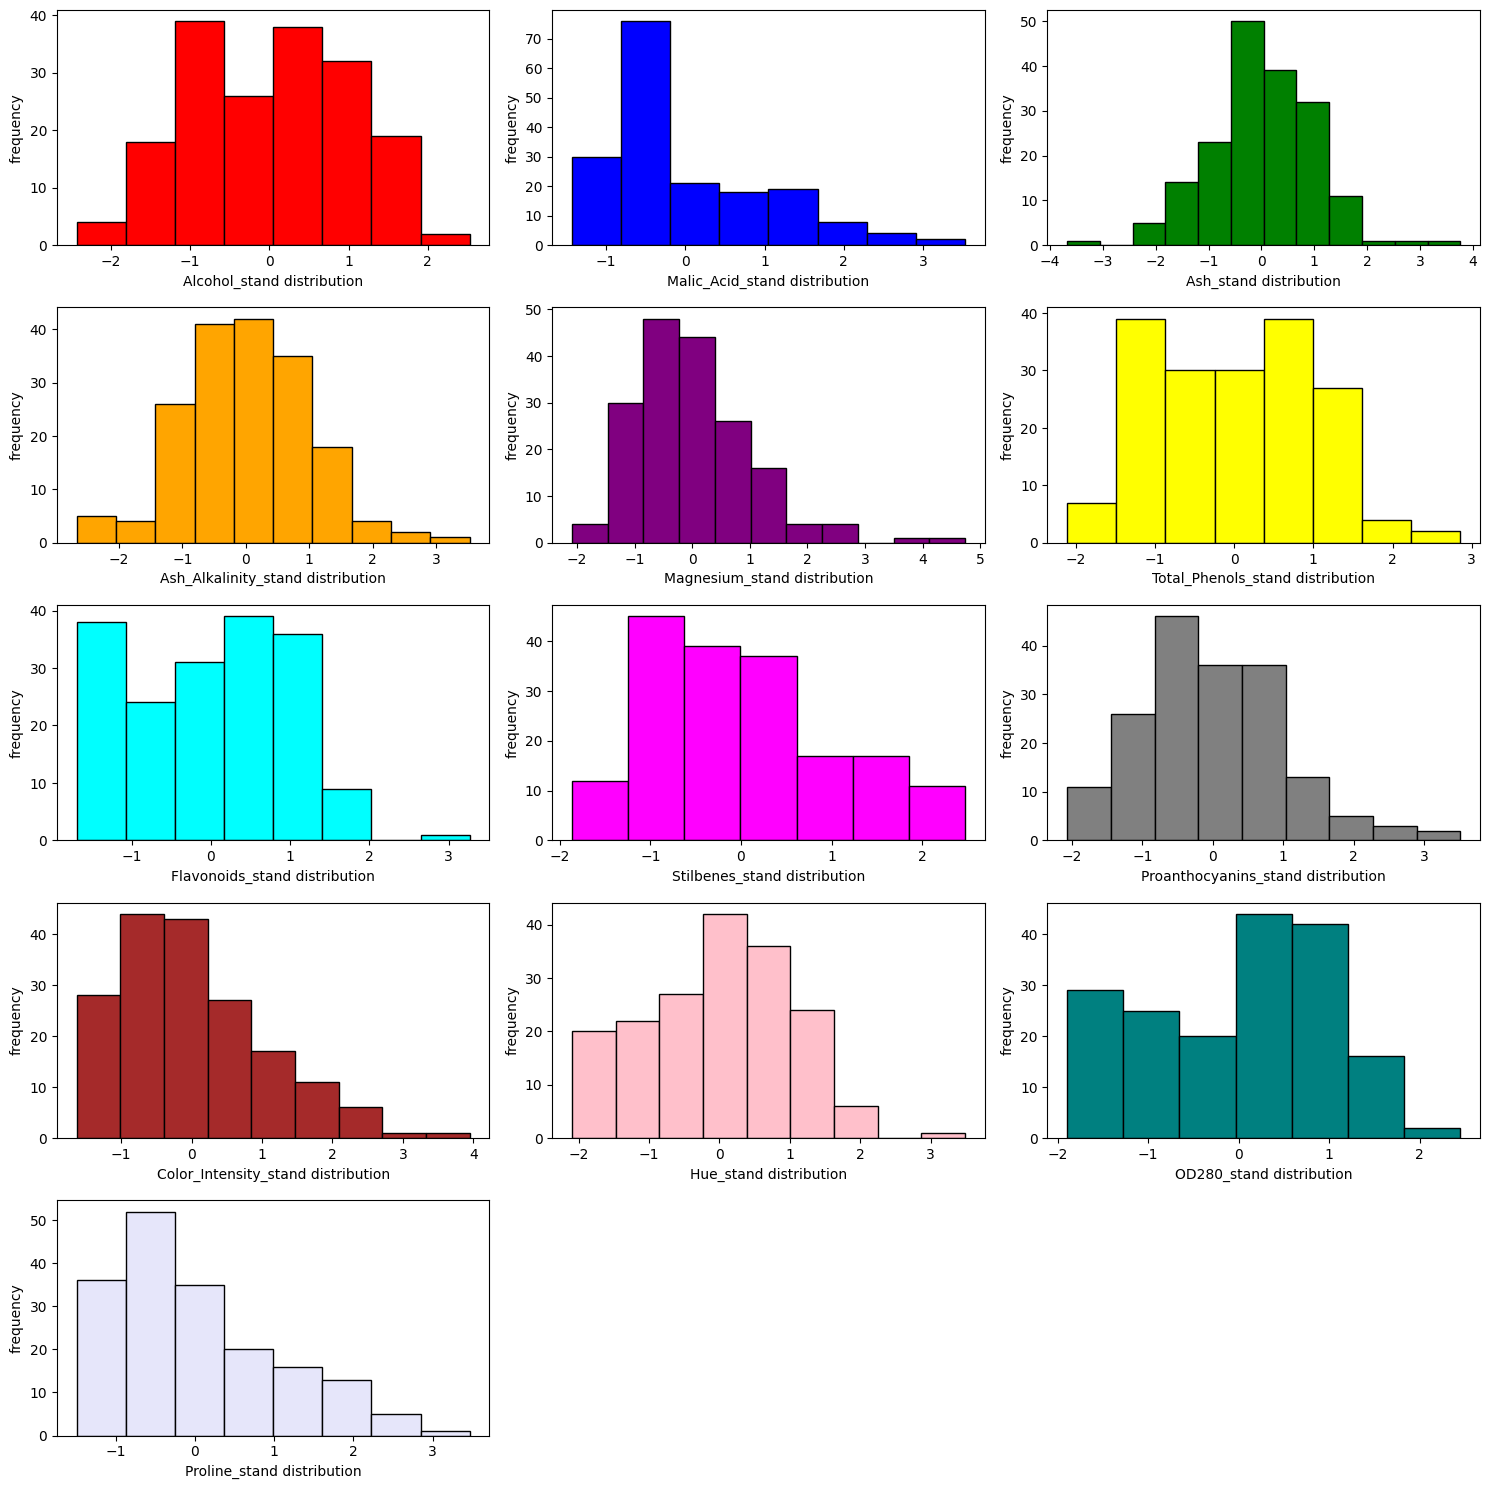

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_freq_dist(predictor, dataframe, color: str = "red", ax=None):
    """
    data: 1d dataframe to plot on the graph
    """
    data = dataframe[predictor]
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data)/data_size**(1./3)

    # define number of bins with accordance to the appropriate size 
    bins = np.arange(data.min().item(), data.max().item() + w, w, dtype=float)

    if ax is None:
        ax = plt.gca()
    ax.hist(data, color=color, edgecolor="black", bins=bins) 
    ax.set_xlabel("{} distribution".format(predictor))
    ax.set_ylabel("frequency")


predictors = df_standardized.columns
colors = ['red', 'blue', 'green', 'orange', 'purple',
          'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'teal', 'lavender']

num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, predictor in enumerate(predictors):
    row_index = i // num_cols
    col_index = i % num_cols
    plot_freq_dist(predictor, dataframe=df_standardized, color=colors[i], ax=axes[row_index, col_index])

for i in range(len(predictors), num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

---

### Question 1: Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_standardized)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component #1', 'principal component #2'])

In [6]:
principalDf.head()

,principal component #1,principal component #2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


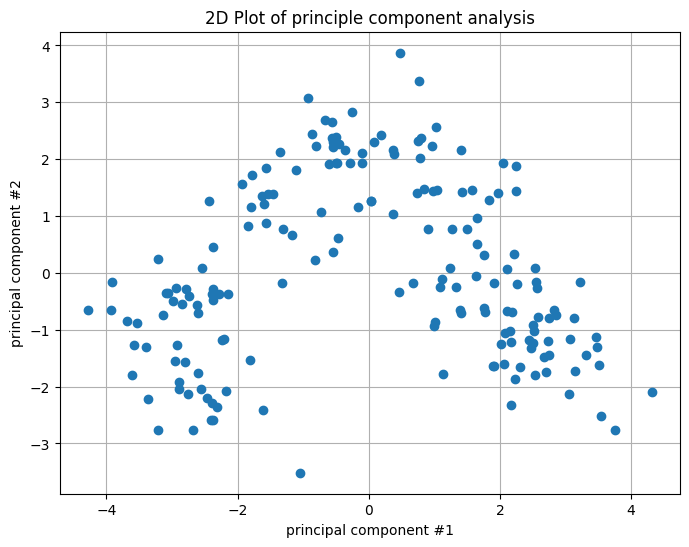

In [7]:
x = principalDf['principal component #1']
y = principalDf['principal component #2']

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='') 
plt.title('2D Plot of principle component analysis')
plt.xlabel('principal component #1')
plt.ylabel('principal component #2')
plt.grid(True)
plt.show()

In [8]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming df_standardized is your standardized dataframe
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_standardized)

# Get the principal component loadings
loadings = pca.components_

# Create a DataFrame to store the principal components and loadings
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component #1', 'principal component #2'])

# Create a DataFrame to store the loadings
loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading'], index=df_standardized.columns)

# Print the loadings DataFrame (or you can use it for further analysis)
print("Principal Component Loadings:")
print(loadingsDf)

Principal Component Loadings:
                       PC1_loading  PC2_loading
Alcohol_stand             0.144329    -0.483652
Malic_Acid_stand         -0.245188    -0.224931
Ash_stand                -0.002051    -0.316069
Ash_Alkalinity_stand     -0.239320     0.010591
Magnesium_stand           0.141992    -0.299634
Total_Phenols_stand       0.394661    -0.065040
Flavonoids_stand          0.422934     0.003360
Stilbenes_stand          -0.298533    -0.028779
Proanthocyanins_stand     0.313429    -0.039302
Color_Intensity_stand    -0.088617    -0.529996
Hue_stand                 0.296715     0.279235
OD280_stand               0.376167     0.164496
Proline_stand             0.286752    -0.364903


In [9]:
loadingsDf.head()

,PC1_loading,PC2_loading
Alcohol_stand,0.144329,-0.483652
Malic_Acid_stand,-0.245188,-0.224931
Ash_stand,-0.002051,-0.316069
Ash_Alkalinity_stand,-0.239320,0.010591
Magnesium_stand,0.141992,-0.299634


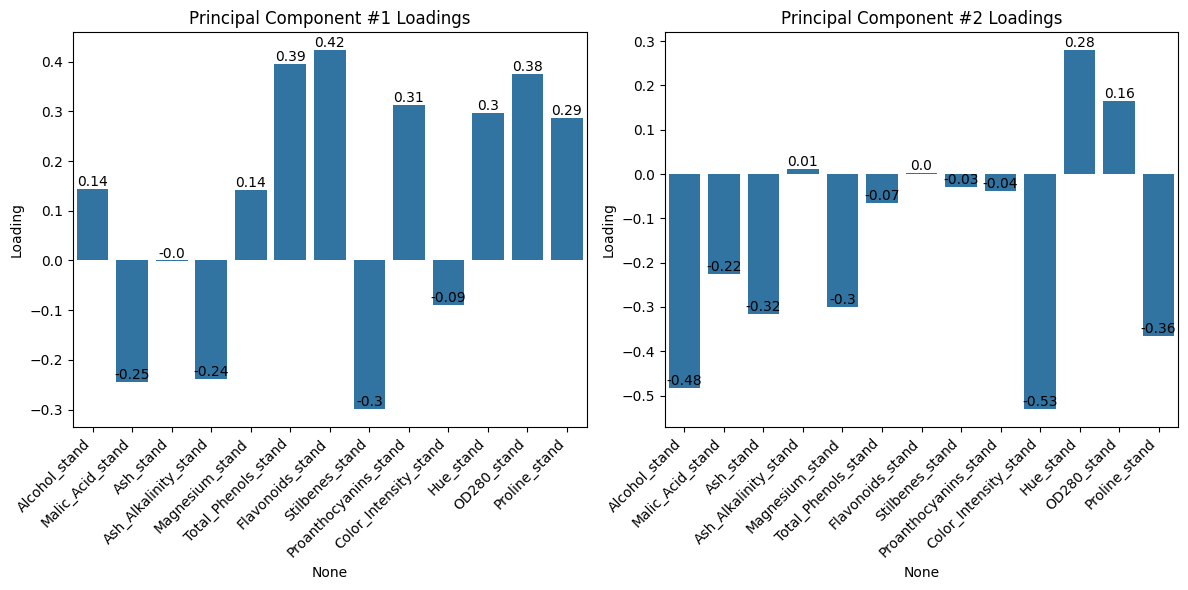

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.barplot(x=loadingsDf.index, y='PC1_loading', data=loadingsDf, ax=axes[0])
axes[0].set_title('Principal Component #1 Loadings')
axes[0].set_ylabel('Loading')

for idx, value in enumerate(loadingsDf['PC1_loading']):
    axes[0].text(idx, value, round(value, 2), ha='center', va='bottom')


sns.barplot(x=loadingsDf.index, y='PC2_loading', data=loadingsDf, ax=axes[1])
axes[1].set_title('Principal Component #2 Loadings')
axes[1].set_ylabel('Loading')

for idx, value in enumerate(loadingsDf['PC2_loading']):
    axes[1].text(idx, value, round(value, 2), ha='center', va='bottom')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Columns represent (in order):
1) Alcohol content (in %)
2) Malic acid concentration (in g/L)
3) Ash content (in mg/L) [This is not as gross as it sounds, mostly minerals absorbed by the
grapes through the soil]
4) Alkalinity of the Ash (g/L of potassium carbonate)
5) Magnesium (mg / L)
6) Total phenols (mg / L per epa method)
7) Flavonoids (mg / L)
8) Stilbenes (mg / L)
9) Proanthocyanins (mg / L)
10) Color intensity (reflecting opacity)
11) Hue (= color)
12) OD280 (Protein concentration)
13) Proline content (amino acid)

In [11]:
# Set threshold for significant loading
threshold = 0.30
significant_variables = loadingsDf

significant_variables = significant_variables.reindex(significant_variables['PC1_loading'].abs().sort_values(ascending=False).index)
significant_variables_pc1 = significant_variables[abs(significant_variables['PC1_loading']) > threshold]

significant_variables = significant_variables.reindex(significant_variables['PC2_loading'].abs().sort_values(ascending=False).index)
significant_variables_pc2 = significant_variables[abs(significant_variables['PC2_loading']) > threshold]

print("Significant variables for PC1:")
print(significant_variables_pc1)
print("\nSignificant variables for PC2:")
print(significant_variables_pc2)

Significant variables for PC1:
                       PC1_loading  PC2_loading
Flavonoids_stand          0.422934     0.003360
Total_Phenols_stand       0.394661    -0.065040
OD280_stand               0.376167     0.164496
Proanthocyanins_stand     0.313429    -0.039302

Significant variables for PC2:
                       PC1_loading  PC2_loading
Color_Intensity_stand    -0.088617    -0.529996
Alcohol_stand             0.144329    -0.483652
Proline_stand             0.286752    -0.364903
Ash_stand                -0.002051    -0.316069


1) **Alcohol content (in %):** (PC2: #2)
   - Alcohol content significantly impacts the taste, body, and overall perception of wine. Wines with higher alcohol content tend to feel fuller-bodied and warmer, while lower alcohol wines may feel lighter and fresher. It can influence the balance between sweetness and acidity as well.

2) **Malic acid concentration (in g/L):**
   - Malic acid contributes to the tartness and crispness of wine. Higher levels of malic acid are often found in cooler-climate wines, contributing to their vibrant acidity. Conversely, warmer-climate wines may undergo malolactic fermentation, converting malic acid into lactic acid, resulting in a smoother, softer mouthfeel.

3) **Ash content (in mg/L):** (PC2: #4)
   - Ash content indicates the mineral composition of the wine, reflecting the soil and vineyard conditions. Different soils impart distinct mineral profiles to grapes, influencing the wine's flavor and structure. For example, volcanic soils may contribute to wines with minerality and complexity.

4) **Alkalinity of the Ash (g/L of potassium carbonate):**
   - Alkalinity affects the pH level of the wine, which in turn impacts its stability, color, and flavor. Wines with higher alkalinity tend to have a more stable pH, which can affect how the wine ages and develops over time.

5) **Magnesium (mg/L):**
   - Magnesium plays a role in enzymatic reactions during fermentation and can affect yeast health. It may also influence the perception of minerality in wine.

6) **Total phenols (mg/L per EPA method):** (PC1: #2)
   - Total phenols contribute to a wine's color, flavor, and mouthfeel. They act as antioxidants and can influence the wine's aging potential. Wines with higher total phenol content may exhibit greater complexity and structure.

7) **Flavonoids (mg/L):** (PC1: #1)
   - Flavonoids, including flavonols and anthocyanins, contribute to a wine's color, aroma, and taste. They also possess antioxidant properties and can impact the wine's perceived bitterness and astringency.

8) **Stilbenes (mg/L):**
   - Stilbenes, such as resveratrol, are antioxidants found in grape skins and are associated with various health benefits. They may also contribute to the wine's color stability and aging potential.

9) **Proanthocyanins (mg/L):** (PC1: #4)
   - Proanthocyanins are tannins found in grape seeds and skins. They contribute to the wine's structure, bitterness, and astringency, as well as its ability to age gracefully.

10) **Color intensity (reflecting opacity):** (PC2: #1)
   - Color intensity reflects the depth and saturation of a wine's color, which is influenced by factors such as grape variety, skin contact during fermentation, and aging in oak barrels. It can provide insights into the wine's age, varietal character, and potential flavor profile.

11) **Hue (= color):**
   - Hue refers to the shade or tint of a wine's color, ranging from reddish-purple to orange-brown. It can indicate the grape variety, age, and winemaking techniques used. For example, younger red wines often exhibit vibrant purple hues, while aged whites may develop golden or amber tones.

12) **OD280 (Protein concentration):** (PC1: #3)
   - OD280 measures the absorbance of light at 280nm and can indicate the protein concentration in the wine. Proteins can affect wine stability, clarity, and mouthfeel. High protein levels may result in haziness or sediment formation over time.

13) **Proline content (amino acid):** (PC2: #3)
   - Proline is an amino acid found in grapes and can influence the wine's flavor, texture, and aging potential. It plays a role in yeast metabolism during fermentation and can contribute to the wine's body and mouthfeel.

Each of these factors contributes to the overall character, quality, and style of the wine, reflecting the interplay between grape variety, terroir, viticultural practices, and winemaking techniques.

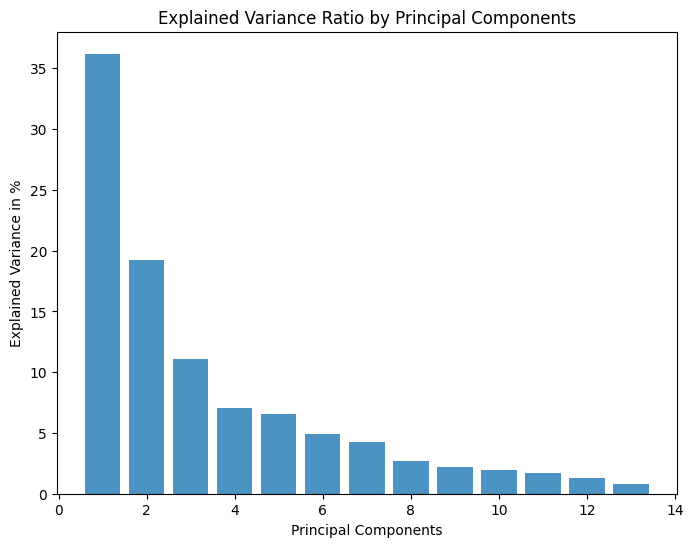

In [12]:
pca = PCA(n_components=df_standardized.shape[1])
principalComponents = pca.fit_transform(df_standardized)
# explained variance ratios: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.8, align='center')
plt.ylabel('Explained Variance in %')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

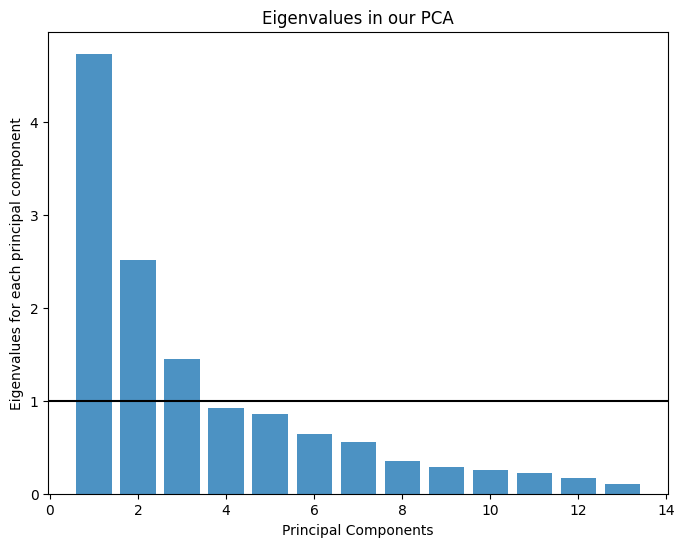

In [13]:
# eigenvalues
eigenvalues = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center')
plt.axhline(y=1, color='k', linestyle='-')  # Add a horizontal line at y=0
plt.ylabel('Eigenvalues for each principal component')
plt.xlabel('Principal Components')
plt.title('Eigenvalues in our PCA')
plt.show()

---

### Question 2: Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.

In [14]:
from sklearn import manifold
import numpy as np

perplexities = np.arange(5, 151, 5)

# dictionary to store perplexity and corresponding KL-divergence
kl_divergences = {}

for perplexity in perplexities:
    tsne = manifold.TSNE(n_components=2, random_state=18618637, n_iter=2000, perplexity=perplexity)
    transformed_data = tsne.fit_transform(df_standardized)
    
    # store the KL-divergence value
    kl_divergences[perplexity] = tsne.kl_divergence_

In [15]:
# step size for numerical differentiation
delta_p = 1e-2

# let's calculate the gradient of KL-divergence with respect to perplexity
gradients = {}
for perplexity in perplexities:
    # compute KL-divergence for perplexity + delta_p
    tsne_high = manifold.TSNE(n_components=2, random_state=18618637, n_iter=2000, perplexity=perplexity + delta_p)
    transformed_data_high = tsne_high.fit_transform(df_standardized)
    kl_divergence_high = tsne_high.kl_divergence_
    
    # compute KL-divergence for perplexity - delta_p
    tsne_low = manifold.TSNE(n_components=2, random_state=18618637, n_iter=2000, perplexity=perplexity - delta_p)
    transformed_data_low = tsne_low.fit_transform(df_standardized)
    kl_divergence_low = tsne_low.kl_divergence_
    
    # estimate gradient using central difference formula
    gradient = (kl_divergence_high - kl_divergence_low) / (2 * delta_p)
    gradients[perplexity] = gradient

# find the perplexity value with the largest absolute gradient
optimal_perplexity = max(gradients, key=lambda x: abs(gradients[x]))

print("Optimal perplexity with fastest convergence:", optimal_perplexity)

Optimal perplexity with fastest convergence: 30


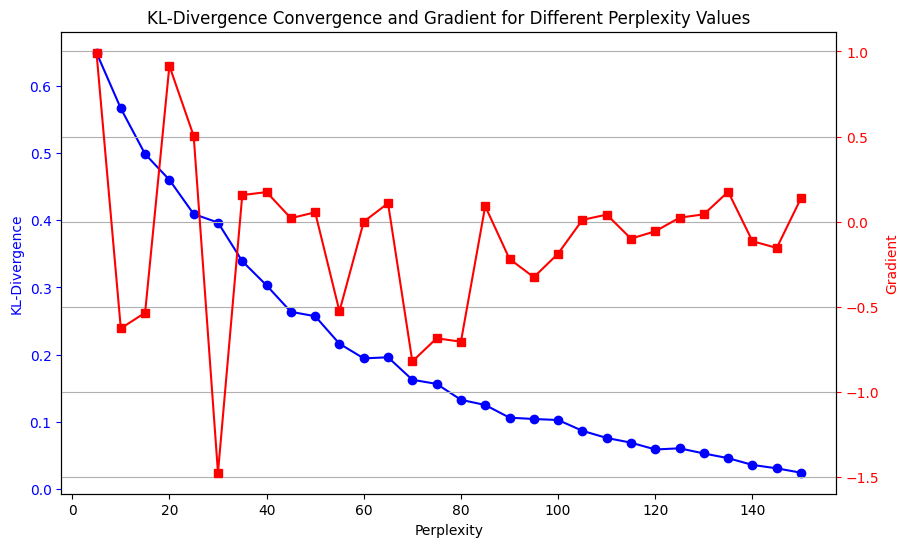

In [16]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# plot KL-divergence convergence
ax1.plot(perplexities, list(kl_divergences.values()), marker='o', linestyle='-', color='b')
ax1.set_xlabel('Perplexity')
ax1.set_ylabel('KL-Divergence', color='b')
ax1.tick_params('y', colors='b')

# create a second y-axis for gradients
ax2 = ax1.twinx()
ax2.plot(perplexities, list(gradients.values()), marker='s', linestyle='-', color='r')
ax2.set_ylabel('Gradient', color='r')
ax2.tick_params('y', colors='r')

plt.title('KL-Divergence Convergence and Gradient for Different Perplexity Values')
plt.grid(True)
plt.show()

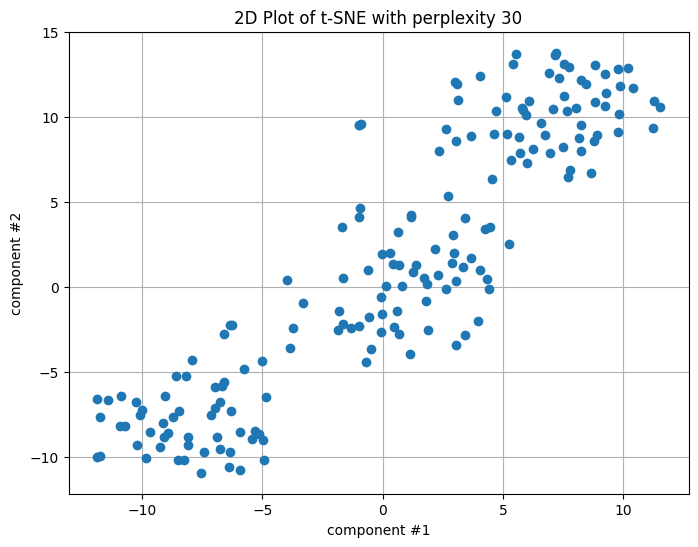

In [17]:
optimal_perplexity = 30
tsne = manifold.TSNE(n_components = 2, random_state = 18618637, n_iter = 2000, perplexity=optimal_perplexity)
transformed_data = tsne.fit_transform(df_standardized)

tSNE_Df = pd.DataFrame(data = transformed_data, columns = ['component #1', 'component #2'])
x = tSNE_Df['component #1']
y = tSNE_Df['component #2']

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='') 
plt.title('2D Plot of t-SNE with perplexity {}'.format(optimal_perplexity))
plt.xlabel('component #1')
plt.ylabel('component #2')
plt.grid(True)
plt.show()

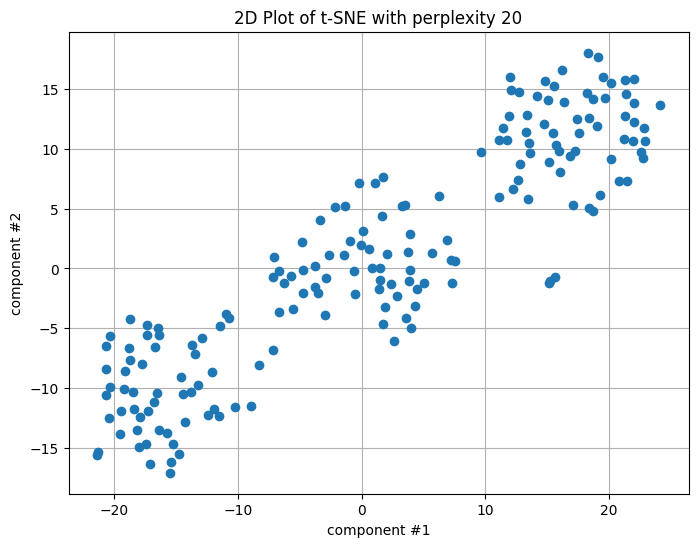

In [18]:
optimal_perplexity = 20
tsne = manifold.TSNE(n_components = 2, random_state = 18618637, n_iter = 2000, perplexity=optimal_perplexity)
transformed_data = tsne.fit_transform(df_standardized)

tSNE_Df = pd.DataFrame(data = transformed_data, columns = ['component #1', 'component #2'])
x = tSNE_Df['component #1']
y = tSNE_Df['component #2']

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='') 
plt.title('2D Plot of t-SNE with perplexity {}'.format(optimal_perplexity))
plt.xlabel('component #1')
plt.ylabel('component #2')
plt.grid(True)
plt.show()

Higher perplexity values tend to result in more global views of the data, where points are spread out more evenly in the embedding space. Lower perplexity values lead to more local views, where clusters and small-scale structures are emphasized.

Perplexity in t-SNE determines the effective number of nearest neighbors considered for each data point during the dimensionality reduction process. Higher perplexity values result in considering more neighbors, while lower perplexity values result in considering fewer neighbors. Perplexity essentially controls the local structure of the embedding.

---

### Question 3: Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE.

Stress of the embedding: 22531.353733103577


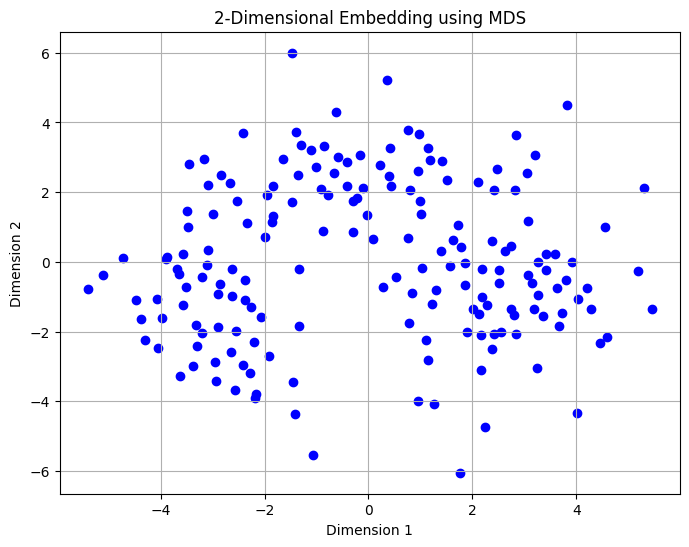

In [20]:
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

pairwise_distances = euclidean_distances(df_standardized)

mds = MDS(n_components=2, dissimilarity='precomputed', n_init=10, random_state=18618637, )

# Fit and transform the data
embedding = mds.fit_transform(pairwise_distances)

# Obtain the stress of the embedding
stress = mds.stress_

print("Stress of the embedding:", stress)

# Plot the 2-dimensional embedding
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], color='blue')
plt.title('2-Dimensional Embedding using MDS')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
# Define a list of MDS algorithms to compare
algorithms = ['classical', 'metric', 'nonmetric']

# Initialize dictionary to store silhouette scores for each algorithm
silhouette_scores = {}

# Iterate over each algorithm
for algorithm in algorithms:
    # Initialize MDS with the current algorithm
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, metric=True if algorithm == 'metric' else False)
    
    # Fit and transform the data
    embedding = mds.fit_transform(pairwise_distances)
    
    # Calculate silhouette score
    silhouette = silhouette_score(df_standardized, mds.embedding_)
    
    # Store silhouette score for the algorithm
    silhouette_scores[algorithm] = silhouette

# Plot silhouette scores for different algorithms
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color='blue')
plt.xlabel('MDS Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different MDS Algorithms')
plt.show()

ValueError: y should be a 1d array, got an array of shape (178, 2) instead.